 
 # **World Happiness Report**


> Happiness is the key indicator of societal well-being. 

This project analyzes global happiness data collected by the United Nations. It explores how economic, social, and health factors influence happiness levels across countries.

## Understanding columns:

1.	**Ladder/ happiness score**: its range is from 0 to 10, where people choose where they thing they belong on this ladder.
2.	**GDP**: This is the logarithm of GDP per person in a country. It’s typical range is around 0.3 – 2.0 , poorer countries are closer to 0.4 whereas, richer countries around 1.8-2.0
3.	**Social support**: This represents how strongly people feel they have someone to rely on in times of trouble. Its range is roughly 0-2. Countries with good social networks score around 1.5-1.6, whereas ones with poor relations score 0.5-0.8.
4.	**Generosity**: This depicts whether people have recently donated money or goods to charity. Its range is -0.2 to 0.6. Positive values show more generosity, near zero show neutral, negative values shoe low generosity.
5.	**Life Expectancy**: This average age up to which an infant is assumed to live. Its range is 0.2 – 1.0.
6.	**Freedom**: This represents the how strongly people feel that they can make their life choices freely. Its range is 0 – 1.0
7.	**Corruption**: This depicts how much people perceive corruption in government and organizational systems. Its range is 0 – 0.5


## Objectives

* Explore happiness scores across various countries and regions
* Visualize relationships between happiness and factors like GDP, social support, and life expectancy
* Visualize happiness levels of each country on world map using color intensity
* Identify key insights and patterns in the data to summarize conclusions
  

****

## Breakdown of this notebook:

1. **Loading Dataset**
2. **Data Cleaning**
    * Understanding columns
    * Deleting unrequired columns
    * Renaming columns
    * Removing missng values from dataset
3. **Data Analysis**
    * Analyzing happiest and unhappiest countries
    * Binning the Happiness score columns
    * Pivot table of happiness score and top 3 factors
    * Correlation matrix
    * Happiness trend across regions
4. **Data Visualization**
    * Frequency of happiness levels
    * Heatmap of correlation matrix
    * Scatterplot of relationship between happiness score and other factors
    * Boxplot displaying happiness across regions
    * Choropleth map of happiness scores by country

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style= 'whitegrid')

In [2]:
%matplotlib inline

****

## STEP 1: Load Dataset

In [3]:
import os 
input_path = '/kaggle/input/world-happiness-report-2024'
os.listdir(input_path)

['World-happiness-report-2024.csv']

In [4]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2024/World-happiness-report-2024.csv")
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


****

## STEP 2: Clean Dataset

**Understanding columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [7]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

**INSIGHT:**
1. Number of countries – 143
2. Missing values –  In columns ,Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life, Generosity,  Perceptions of corruption and Dystopia + residual
3. Data types of all columns are correct and suitable

**Deleting unrequired columns** 

In [8]:
df= df.drop(['upperwhisker','lowerwhisker','Dystopia + residual'],axis=1)

**Renaming columns**

In [9]:
df= df.rename(columns={ 'Country name':'Country',
                      'Regional indicator':'Region',
                      'Ladder score':'Happiness score',
                      'Log GDP per capita':'GDP (log)',
                      'Healthy life expectancy':'Life expectancy',
                      'Freedom to make life choices':'Freedom',
                      'Perceptions of corruption':'Corruption'
                      })

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness score', 'GDP (log)', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')

**Replace missing values with mean**

In [11]:
cols_to_fill = ['GDP (log)', 'Social support','Life expectancy', 'Freedom', 'Generosity', 'Corruption']

for col in cols_to_fill:
    df[col]= df[col].fillna(df[col].mean())

In [12]:
df.isnull().sum()

Country            0
Region             0
Happiness score    0
GDP (log)          0
Social support     0
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

In [13]:
df.head()

,Country,Region,Happiness score,GDP (log),Social support,Life expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


****

## STEP 3: Analyzing data

In [14]:
df.describe()

,Happiness score,GDP (log),Social support,Life expectancy,Freedom,Generosity,Corruption
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121
std,1.170717,0.420584,0.329777,0.163171,0.160766,0.072661,0.124898
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.726000,1.079000,0.924500,0.400000,0.531000,0.092500,0.069000
50%,5.785000,1.403000,1.217000,0.549000,0.632000,0.138000,0.122000
75%,6.416000,1.733000,1.377000,0.644000,0.734000,0.191500,0.191000
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000


**Top 5 Happiest countries**

In [15]:
df[['Country','Happiness score']].head()

,Country,Happiness score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341


**Top 5 Unhappiest countries**

In [16]:
df[['Country','Happiness score']].tail()

,Country,Happiness score
138,Congo (Kinshasa),3.295
139,Sierra Leone,3.245
140,Lesotho,3.186
141,Lebanon,2.707
142,Afghanistan,1.721


**Creating bins(low, medium, high) for Happiness score column**

In [17]:
bins = np.linspace (min(df['Happiness score']),max(df['Happiness score']),4)
group_names = ['low','medium','high']
df['Happiness level'] = pd.cut(df['Happiness score'],bins,labels=group_names,include_lowest=True)

In [18]:
df['Happiness level'].value_counts()

Happiness level
high      73
medium    58
low       12
Name: count, dtype: int64

**INSIGHT:** 
* The number of countries with a high happiness level is 73, i.e, slightly more than half of the total number of countries.
* 91.6% countries enjoy a high and medium happiness level, which is a vast number


**Finding correlation between all the numerical columns**

In [19]:
corr_matrix={'Happiness score':1.000000, 'GDP (log)':0.767181, 'Social support':0.812142, 'Life expectancy':0.758352,
             'Freedom':0.643342,'Generosity':0.129815,'Corruption':0.451052}
df.corr(numeric_only=True)['Happiness score']


Happiness score    1.000000
GDP (log)          0.767181
Social support     0.812142
Life expectancy    0.758352
Freedom            0.643342
Generosity         0.129815
Corruption         0.451052
Name: Happiness score, dtype: float64

**INSIGHT:**
1. Social support has the highest impact on happiness score, whereas generosity has the least
2. GDP and life expectancy also play a significant role in determining happiness score of a nation.
3. These factors are interdependant

**Visulaize key factors by happiness level**

In [20]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Happiness level'>

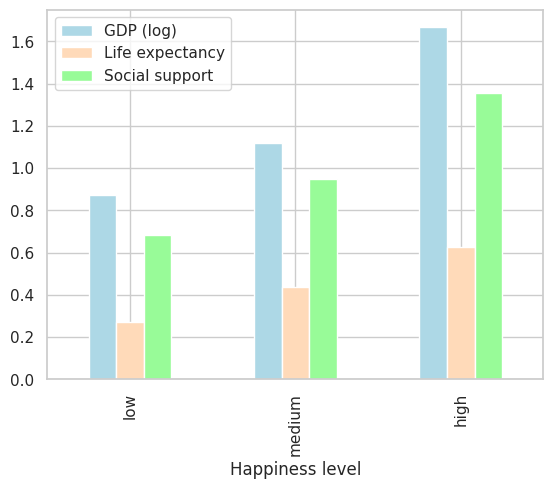

In [21]:
pivot = df.pivot_table( index = 'Happiness level',values=['GDP (log)','Social support','Life expectancy'],
                        aggfunc='mean'
                        )
pivot.plot(kind='bar', color=['lightblue','peachpuff','palegreen'])

**Happiness trends across regions**

In [22]:
# Distribution of happiness score based on region
df['Region'].value_counts()

Region
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    10
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64

In [23]:
region_analysis = df.groupby('Region')['Happiness score'].agg(['mean','std','count']).sort_values(by='mean',ascending=False)
region_analysis

,mean,std,count
Region,,,
North America and ANZ,6.927750,0.151476,4
Western Europe,6.841650,0.538030,20
Central and Eastern Europe,6.170941,0.494803,17
Latin America and Caribbean,6.143368,0.376936,19
East Asia,5.934333,0.398773,6
Southeast Asia,5.551889,0.779519,9
Commonwealth of Independent States,5.538500,0.480649,10
Middle East and North Africa,5.199941,1.260354,17
Sub-Saharan Africa,4.329686,0.704075,35


**INSIGHT:**
1. The highest count of countries belong to Sub-Saharan Africa region, however the Happiness score among these countries is the very low with an average of 4.33.
2. North America and ANZ region has the highest mean happiness score of 6.93, followed by, Western Europe and, Central and Eastern Europe.
3. South Asia consists of 6 countries and has the lowest average happiness score of 3.90.

****

## STEP 4: Data Visualization

**Frequency of happiness levels**

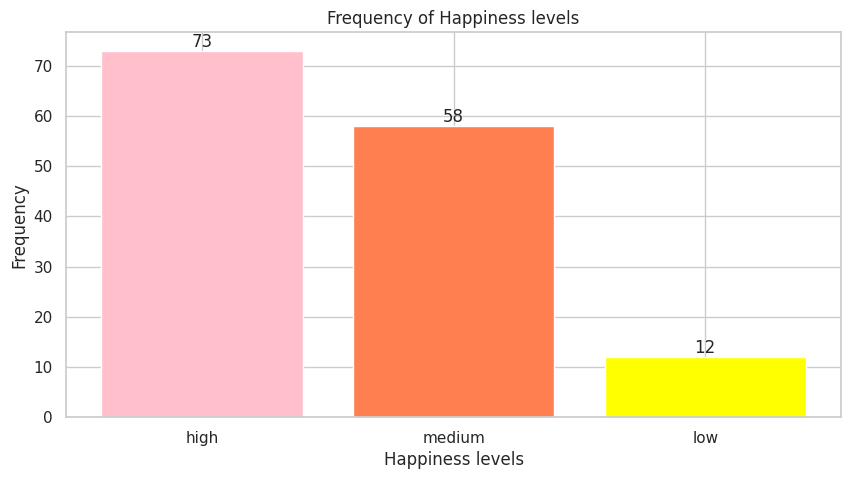

In [24]:
plt.figure(figsize=(10,5))
happiness_count = df['Happiness level'].value_counts()
plt.bar(happiness_count.index, happiness_count.values,color=['pink','coral','yellow'])
for index, value in enumerate(happiness_count.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Frequency of Happiness levels')
plt.xlabel('Happiness levels')
plt.ylabel('Frequency')
plt.show()

**Heatmap displaying the correlation of happiness factors**

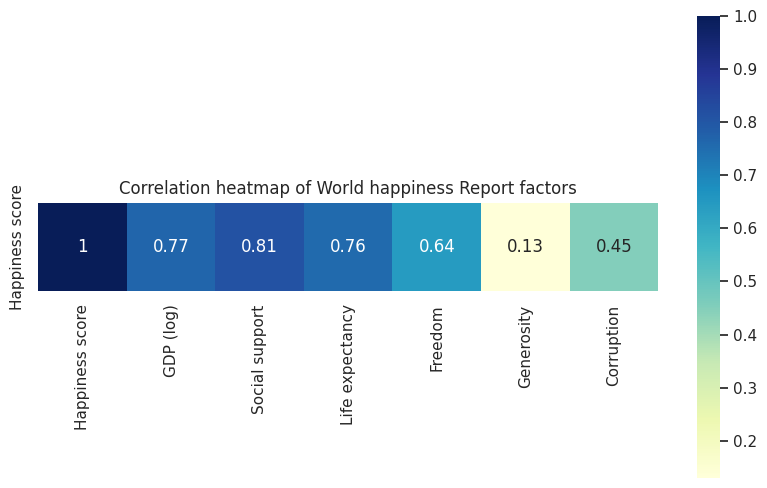

In [25]:
corr_df= pd.DataFrame(corr_matrix, index=['Happiness score'])
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu', square=True)

plt.title('Correlation heatmap of World happiness Report factors')
plt.show()

**Relation between Happiness score and key factors**

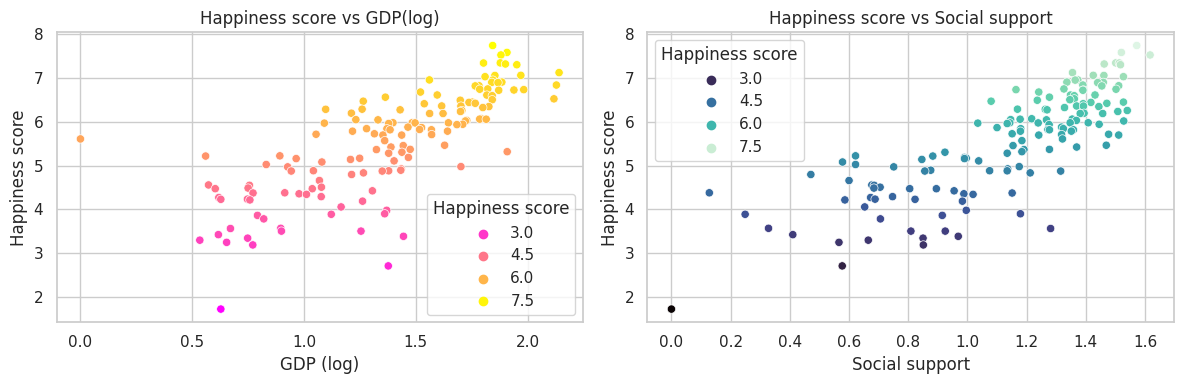

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

# Realtion between happiness score and GDP of a country
sns.scatterplot(data=df, x='GDP (log)', y='Happiness score', hue='Happiness score', palette='spring', ax=ax1)
ax1.set_title('Happiness score vs GDP(log)')

# Realtion between happiness score and Social support in a country
sns.scatterplot(data=df, x='Social support', y='Happiness score', hue='Happiness score', palette='mako', ax=ax2)
ax2.set_title('Happiness score vs Social support')

plt.tight_layout()
plt.show()

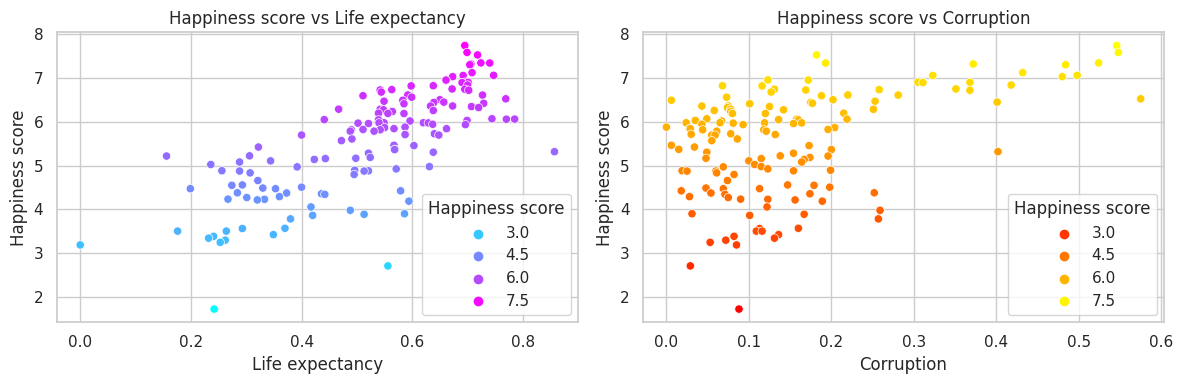

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

# Realtion between happiness score and Life expectancy in a country
sns.scatterplot(data=df, x='Life expectancy', y='Happiness score', hue='Happiness score', palette='cool', ax=ax1)
ax1.set_title('Happiness score vs Life expectancy')

# Realtion between happiness score and Corruption in a country
sns.scatterplot(data=df, x='Corruption', y='Happiness score', hue='Happiness score', palette='autumn', ax=ax2)
ax2.set_title('Happiness score vs Corruption')

plt.tight_layout()
plt.show()

**Box plot displaying happiness score across regions**

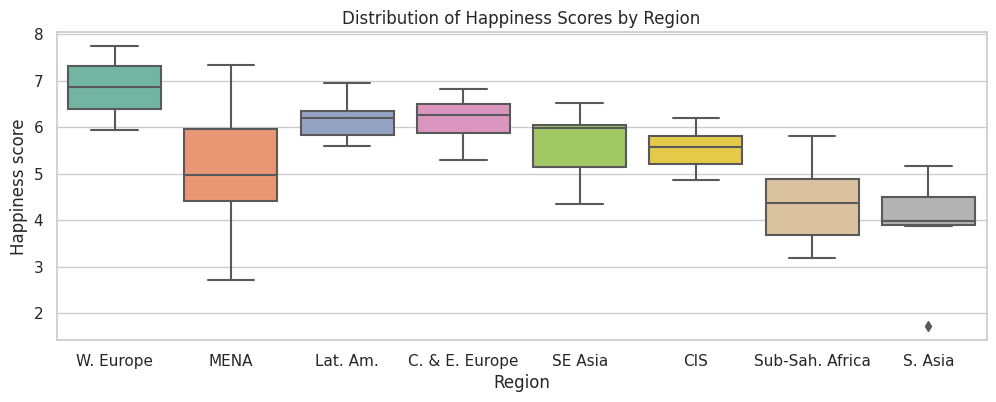

In [28]:
short_labels = {
    'Western Europe': 'W. Europe',
    'Sub-Saharan Africa': 'Sub-Sah. Africa',
    'North America': 'N. America',
    'South Asia': 'S. Asia',
    'Latin America and Caribbean': 'Lat. Am.',
    'Eastern Asia': 'E. Asia',
    'Southeast Asia': 'SE Asia',
    'Commonwealth of Independent States': 'CIS',
    'Middle East and North Africa': 'MENA',
    'Central and Eastern Europe': 'C. & E. Europe'
}

# Add a new column for plotting only (original data stays intact)
df['Region_Short'] = df['Region'].map(short_labels)
plt.figure(figsize=(12,4))
sns.boxplot(x='Region_Short', y='Happiness score', data=df, palette='Set2')
plt.title('Distribution of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness score')
plt.xticks()
plt.show()

**INSIGHT:**
1. Western Europe and Latin America have the highest median happiness scores
2. Sub-Saharan Africa and South Asia have the lowest median happiness scores
3. The Middle East and North Africa region shows the largest spread in happiness scores, indicating a wide range of happiness levels within region

**Map of Happiness levels by country**

In [29]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly.express as px
fig = px.choropleth( df, locations='Country', locationmode='country names', color='Happiness score', 
                    hover_name='Country', color_continuous_scale='RdYlGn', 
                   title='Global Happiness scores by country')
fig.show()

**INSIGHT:**
1. Countries in North America, Western Europe and Oceania generally show highest scores
2. Countries in South America, Wastern Europe, Russia and parts of Central and Southeast Asia tend to have moderate happiness scores
3. Many countries in Africa and parts of Middle East and Asia show lowest happiness scores
4. The map suggests a correlation between a country's level of development and its happiness score

****

## Final Insights

* Developed countries tend to have higher happiness scores.
* The happiest regions are mostly in Western Europe and North America, while Sub-Saharan African and South Asia show the lowest scores.
* Social support, GDP per capita and Life expectancy have the strongest positive correlation with happiness.
* Generosity and perceptions of corruption show weak relationships with happiness.
* A few countries show hgiher happiness despite lower GDP, suggesting cultural and social factors contribute strongly.
* Finland is ranked the happiest country in 2024, whereas Afghanistan is ranked the unhappiest.
* Improving health, trust and social connections may raise national happiness levels even without major GDP growth.